In [2]:
from google.colab import files
files.upload()   # ← Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aswink28","key":"f876710e84495860b3fa6f5a03a2ead8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets list


ref                                                                title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
shahzadi786/world-smartphone-market-2025                           World Smartphone Market 2025                             17795  2025-11-09 04:52:42.650000           1671         54  1.0              
sadiajavedd/students-academic-performance-dataset                  Students_Academic_Performance_Dataset                     8907  2025-10-23 04:16:35.563000           4163        103  1.0              
ayeshaimran123/social-media-and-mental-health-balance              Social Media and Mental Health Balance                    5941  2025-10-26 07:51:53.380000           5029         67  1.0

In [6]:
!kaggle datasets download -d uciml/adult-census-income
!unzip adult-census-income.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income
License(s): CC0-1.0
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 549MB/s]
Archive:  adult-census-income.zip
  inflating: adult.csv               


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
import pylab
import graphviz
from sklearn import tree


from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
df=pd.read_csv("/content/adult.csv")

In [9]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
df.shape

(32561, 15)

In [12]:
df.isnull().sum()/len(df)*100

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
education.num,0.0
marital.status,0.0
occupation,0.0
relationship,0.0
race,0.0
sex,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
df.drop(columns=['fnlwgt'],inplace=True)

In [17]:
import missingno as msno

<Axes: >

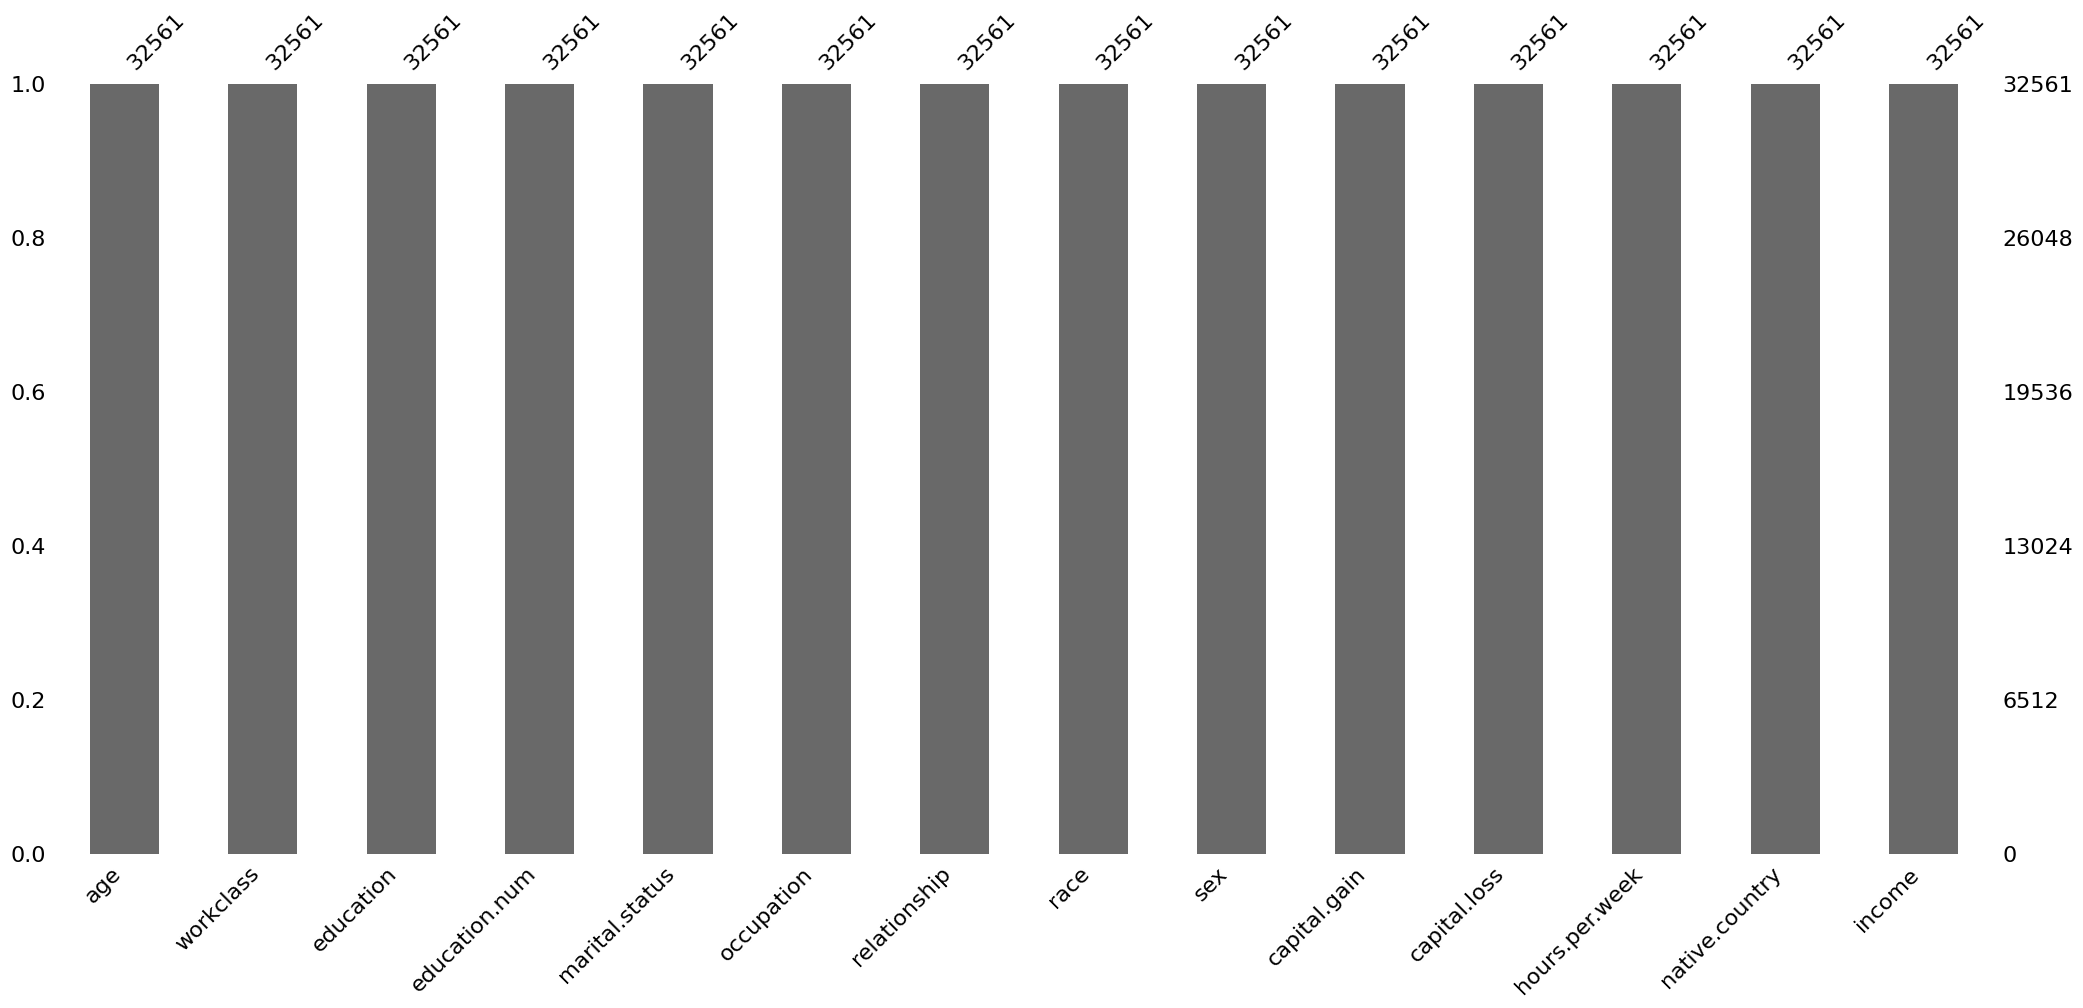

In [18]:
msno.bar(df)

In [19]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].dtype=='O':
            df[i]=df[i].fillna(df[i].mode()[0])
        elif df[i].dtype=='int' or df[i].dtype=='float':
            df[i]=df[i].fillna(df[i].mean())
        else:
            pass

In [20]:
df.isnull().sum()

,0
age,0
workclass,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0
capital.gain,0


In [22]:
df.nunique()

,0
age,73
workclass,9
education,16
education.num,16
marital.status,7
occupation,15
relationship,6
race,5
sex,2
capital.gain,119


In [24]:
df['sex']=df['sex'].replace({'Male':1,'Female':0})

/tmp/ipython-input-1367084199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']=df['sex'].replace({'Male':1,'Female':0})


In [27]:
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [26]:
df1=pd.get_dummies(columns=[i for i in df.columns if df[i].dtype=="O"],drop_first=True, data=df)
df1

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
0,90,9,0,0,4356,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,82,9,0,0,4356,18,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,66,10,0,0,4356,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,54,4,0,0,3900,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,41,10,0,0,3900,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32557,27,12,0,0,0,38,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32558,40,9,1,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
32559,58,9,0,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [29]:
x=df1.drop(columns=['income_>50K'])
y=df1['income_>50K']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
Ad=AdaBoostClassifier()

In [32]:
Ad.fit(x_train,y_train)

AdaBoostClassifier()

In [33]:
y_pred=Ad.predict(x_test)

In [34]:
y_pred_train= Ad.predict(x_train)

In [35]:
accuracy_score(y_pred,y_test)

0.8487640104406572

In [36]:
importance=pd.DataFrame({'Features Names':x_train.columns,'Importance':Ad.feature_importances_})

In [37]:
Feature_Importance= importance.sort_values(by='Importance',ascending=False)

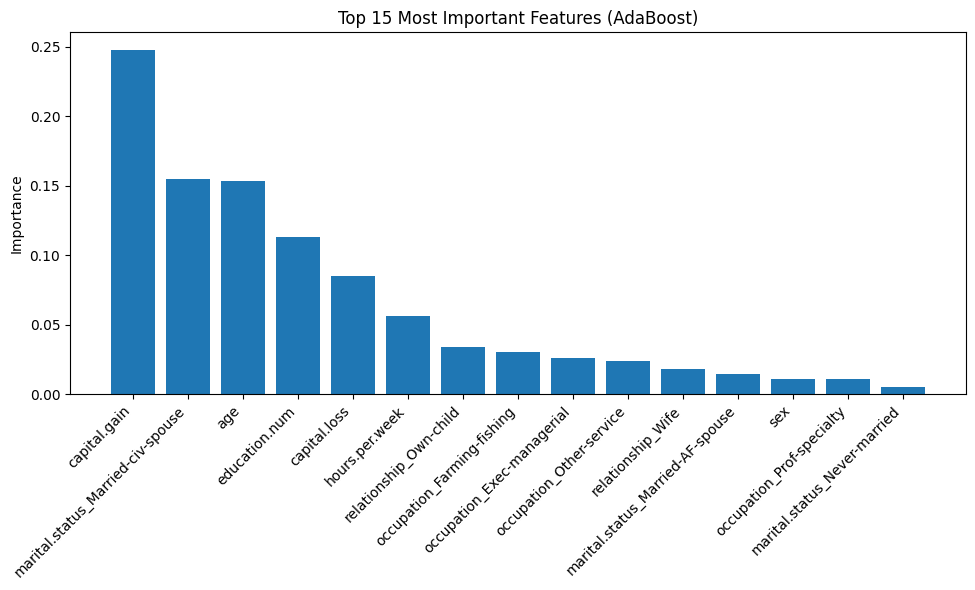

In [72]:
importances = Ada.feature_importances_
indices = np.argsort(importances)[::-1]   # sort descending
top_n = 15

plt.figure(figsize=(10,6))
plt.bar(range(top_n), importances[indices][:top_n])
plt.xticks(range(top_n), x.columns[indices][:top_n], rotation=45, ha='right')
plt.ylabel("Importance")
plt.title("Top 15 Most Important Features (AdaBoost)")
plt.tight_layout()
plt.show()

In [40]:
grid_param={
    "n_estimators":[10,50,100,500,200],
    "learning_rate":[0.0001,0.01,0.001,1.0]
}

In [41]:
grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid_param,n_jobs=-1,scoring='accuracy')

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.001, 1.0],
                         'n_estimators': [10, 50, 100, 500, 200]},
             scoring='accuracy')

In [43]:
grid_search.best_score_

np.float64(0.8573019530275557)

In [60]:
best_parameter=grid_search.best_params_

In [61]:
Ada=AdaBoostClassifier(**best_parameter)

In [65]:
Ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.5)

In [66]:
Ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200)

In [67]:
y_pred_train= Ada.predict(x_train)

In [68]:
y_pred = Ada.predict(x_test)

In [69]:
accuracy_score(y_pred,y_test)

0.8545984953170582

In [70]:
accuracy_score(y_pred_train,y_train)

0.8563805282555282